## Data Sources: Uniform Crime Report
* **2016 Data**: Table 3 - Crime in the United States by State, 2016. Retrieved from the FBI Uniform Crime Reporting (UCR) Program:
https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/tables/table-3

* **2020 Data**: Table 5 - Crime in the United States by State, 2020. Available via the FBI Crime Data Explorer:
https://cde.ucr.cjis.gov/LATEST/webapp/#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import data_prep_functions as prep

In [2]:
spotlite = prep.aggregate_spotlite_to_state_long('Data/SPOTLITE.csv')

In [3]:
crimes_2016 = prep.extract_state_total_crime('Data/table-3.xlsx')
crimes_2020 = prep.extract_state_total_crime('Data/Table_05_Crime_in_the_United_States_by_State_2020.xlsx')

In [4]:
crimes = pd.concat([crimes_2016, crimes_2020])
crimes.describe()

3,YEAR,POPULATION,TOTAL_CRIME
count,102.000000,102.0,102.0
mean,2018.000000,6398153.294118,166345.45098
std,2.009877,7273752.789691,198709.704168
min,2016.000000,582328.0,8667.0
25%,2016.000000,1795318.5,41563.5
50%,2018.000000,4457112.5,120965.0
75%,2020.000000,7388050.75,200628.25
max,2020.000000,39368078.0,1176866.0


In [5]:
lemas_2016 = prep.read_lemas('Data/LEMAS2016.tsv')
lemas_2020 = prep.read_lemas('Data/LEMAS2020.tsv')

795 rows from 3499 dropped due to FTSWORN < 1 or survey completion rate below 60%.


In [7]:
lemas = pd.concat([lemas_2020, lemas_2016])
lemas.describe()

,YEAR,FTSWORN,%_FEMALE,%_BLACK,%_HISP,CCRB,CFDBK_POLICY
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,2018.000000,8526.705882,0.116685,0.099935,0.072229,0.151514,0.256872
std,2.009877,11902.323814,0.039757,0.102381,0.085525,0.172908,0.229223
min,2016.000000,286.000000,0.035545,0.002024,0.003981,0.000000,0.000000
25%,2016.000000,2053.750000,0.084703,0.020409,0.021012,0.064928,0.050598
50%,2018.000000,4230.500000,0.113261,0.070359,0.035357,0.099450,0.214769
75%,2020.000000,9489.750000,0.138818,0.132588,0.074635,0.177484,0.408948
max,2020.000000,60466.000000,0.240114,0.528287,0.373749,1.000000,1.000000


In [8]:
merged = lemas.merge(crimes, on=['STATE', 'YEAR'], how='left')
data = merged.merge(spotlite, on=['STATE', 'YEAR'], how='left')

In [12]:
data.describe()

,YEAR,W_FTSWORN,%_FEMALE,%_BLACK,%_HISP,CCRB,CFDBK_POLICY,POPULATION,TOTAL_CRIME,USE_OF_FORCE_COUNT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0,102.0,102.000000
mean,2018.000000,12313.769959,0.112889,0.088704,0.069455,0.150609,0.257460,6398153.294118,166345.45098,59.637255
std,2.009877,14389.791561,0.035828,0.102422,0.090889,0.174100,0.230734,7273752.789691,198709.704168,69.649020
min,2016.000000,342.777544,0.035140,0.000635,0.002547,0.000000,0.000000,582328.0,8667.0,2.000000
25%,2016.000000,3246.430345,0.085899,0.019673,0.018905,0.055985,0.047234,1795318.5,41563.5,17.750000
50%,2018.000000,7633.616311,0.108025,0.054002,0.032871,0.098215,0.187831,4457112.5,120965.0,43.000000
75%,2020.000000,15041.558327,0.134937,0.117388,0.064316,0.175904,0.418026,7388050.75,200628.25,74.500000
max,2020.000000,66894.781064,0.228578,0.528287,0.490729,1.000000,1.000000,39368078.0,1176866.0,435.000000


In [13]:
# Calculate Lethal Force Rate by Residents or Crimes
data['%_FORCE_TO_RESIDENT'] = data['USE_OF_FORCE_COUNT'] * 100000 / data['POPULATION']
data['%_FORCE_TO_CRIME'] = data['USE_OF_FORCE_COUNT'] * 1000 / data['TOTAL_CRIME']
data['STD_FORCE_TO_RESIDENT'] = prep.standardize(data['%_FORCE_TO_RESIDENT'])
data['STD_FORCE_TO_CRIME'] = prep.standardize(data['%_FORCE_TO_CRIME'])
data

,STATE,YEAR,W_FTSWORN,%_FEMALE,%_BLACK,%_HISP,CCRB,CFDBK_POLICY,POPULATION,TOTAL_CRIME,STATE_NAME,USE_OF_FORCE_COUNT,%_FORCE_TO_RESIDENT,%_FORCE_TO_CRIME,STD_FORCE_TO_RESIDENT,STD_FORCE_TO_CRIME
0,AK,2020,342.777544,0.067099,0.032091,0.046678,0.459881,0.459881,731158,22654,Alaska,20,2.735387,0.882846,0.796543,0.939867
1,AL,2020,10492.940100,0.076465,0.194595,0.014226,0.163964,0.280400,4921532,127483,Alabama,75,1.523916,0.588314,0.40864,0.572997
2,AR,2020,6194.600849,0.118438,0.102165,0.027183,0.135750,0.382527,3030522,99563,Arkansas,50,1.649881,0.502195,0.448973,0.465728
3,AZ,2020,10622.672000,0.105295,0.029564,0.214524,0.045093,0.595451,7421401,201303,Arizona,121,1.63042,0.601084,0.442741,0.588904
4,CA,2020,66651.380510,0.136253,0.056593,0.338667,0.127607,0.640459,39368078,1016080,California,435,1.104956,0.428116,0.274492,0.373455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,VT,2016,1178.048996,0.094325,0.003395,0.002547,0.010872,0.000000,624594,11591,Vermont,2,0.320208,0.172548,0.023222,0.05512
98,WA,2016,9302.928413,0.100686,0.028256,0.040850,0.106864,0.086963,7288000,276676,Washington,55,0.754665,0.198788,0.162332,0.087806
99,WI,2016,14952.996526,0.135410,0.041057,0.035672,0.310150,0.014970,5778708,129399,Wisconsin,36,0.622977,0.278209,0.120166,0.186732
100,WV,2016,3411.887731,0.035140,0.016675,0.007525,0.046424,0.143784,1831102,44044,West Virginia,24,1.310686,0.54491,0.340365,0.518933


In [58]:
data.to_pickle('Data/data_cleaned.pkl')

In [14]:
# Split Data by Year
data_2016 = data[data['YEAR'] == 2016]
data_2020 = data[data['YEAR'] == 2020]

# Hypothesis 1

### Data Preview

In [27]:
data[['%_FEMALE', '%_FORCE_TO_RESIDENT','%_FORCE_TO_CRIME' ,'STD_FORCE_TO_RESIDENT', 'STD_FORCE_TO_CRIME']].describe()

,%_FEMALE,%_FORCE_TO_RESIDENT,%_FORCE_TO_CRIME,STD_FORCE_TO_RESIDENT,STD_FORCE_TO_CRIME
count,102.000000,102.0,102.0,102.0,102.0
mean,0.112889,1.038348,0.397255,0.253165,0.335015
std,0.035828,0.532983,0.170758,0.170657,0.212696
min,0.035140,0.247682,0.128296,0.0,0.0
25%,0.085899,0.677749,0.279163,0.137704,0.187921
50%,0.108025,0.946895,0.362506,0.223882,0.291732
75%,0.134937,1.246136,0.489062,0.319697,0.44937
max,0.228578,3.370809,0.931123,1.0,1.0


Conclusion:

- The mean value of %_FEMALE is 0.12, and the value is between 0.03 to 0.25.

- The mean value of %_FORCE_TO_RESIDENT	is 1.03, and the value is between 0.24 to 3.37.

- The mean value of %_FORCE_TO_CRIME is 0.39, and the value is between 0.12 to 0.93.

- The mean value of STD_FORCE_TO_RESIDENT is 0.25, and the value is between 0.03 to 0.25.

- The mean value of STD_FORCE_TO_CRIME is 0.33.

### Scatter

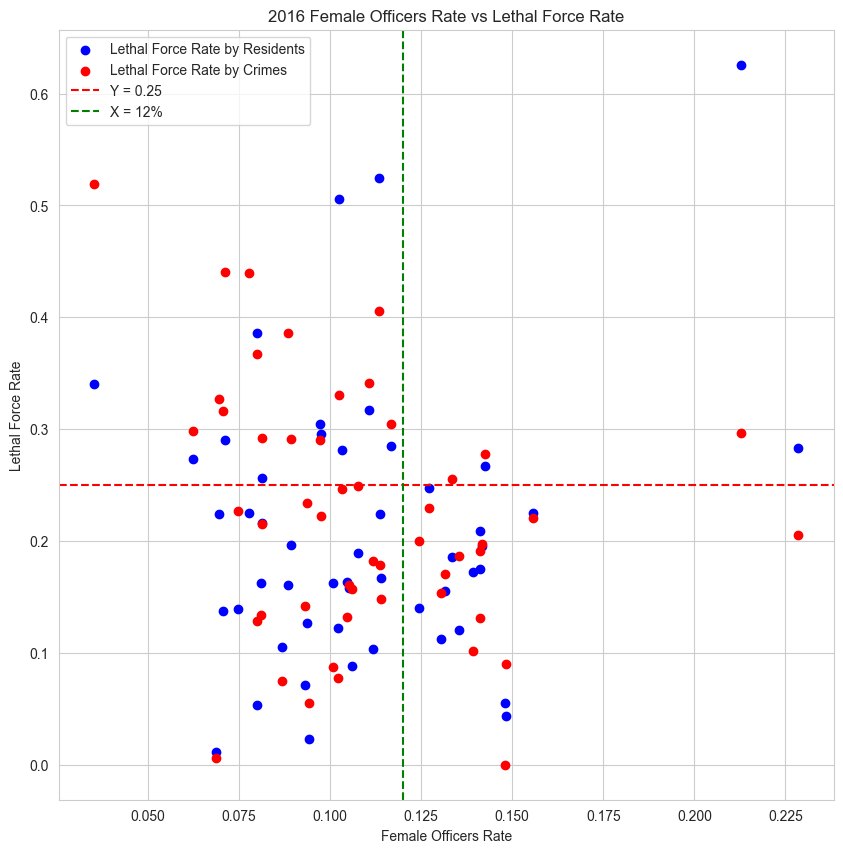

In [29]:
# Figure 1: 2016 Female Officers Rate vs Lethal Force Rate by Residents and Crimes
plt.figure(figsize=(10, 10))
plt.scatter(data_2016['%_FEMALE'], data_2016['STD_FORCE_TO_RESIDENT'], color='blue', label='Lethal Force Rate by Residents')
plt.scatter(data_2016['%_FEMALE'], data_2016['STD_FORCE_TO_CRIME'], color='red', label='Lethal Force Rate by Crimes')
plt.axhline(y=0.25, color='red', linestyle='--', label='Y = 0.25')
plt.axvline(x=0.12, color='green', linestyle='--', label='X = 12%')
plt.xlabel('Female Officers Rate')
plt.ylabel('Lethal Force Rate')
plt.title("2016 Female Officers Rate vs Lethal Force Rate")
plt.legend()
plt.show()

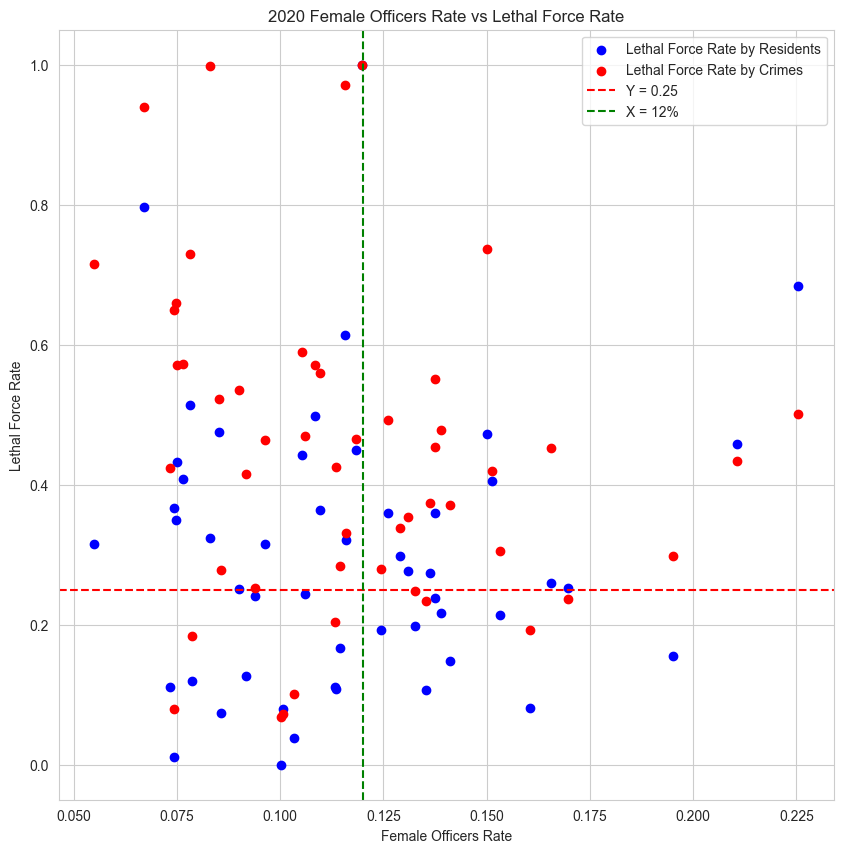

In [31]:
# FIgure 2: 2020 Female Officers Rate vs Lethal Force Rate by Residents and Crimes
plt.figure(figsize=(10, 10))
plt.scatter(data_2020['%_FEMALE'], data_2020['STD_FORCE_TO_RESIDENT'], color='blue', label='Lethal Force Rate by Residents')
plt.scatter(data_2020['%_FEMALE'], data_2020['STD_FORCE_TO_CRIME'], color='red', label='Lethal Force Rate by Crimes')
plt.axhline(y=0.25, color='red', linestyle='--', label='Y = 0.25')
plt.axvline(x=0.12, color='green', linestyle='--', label='X = 12%')
plt.xlabel('Female Officers Rate')
plt.ylabel('Lethal Force Rate')
plt.title("2020 Female Officers Rate vs Lethal Force Rate")
plt.legend()
plt.show()

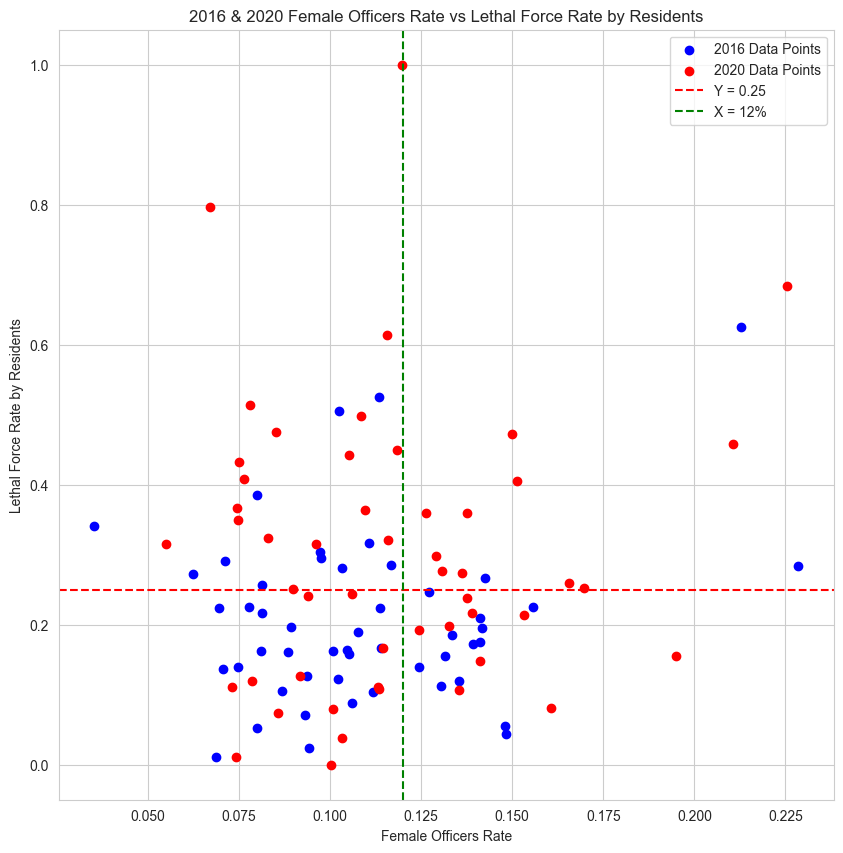

In [32]:
# Figure 3: 2016 & 2020 Female Officers Rate vs Lethal Force Rate by Residents
plt.figure(figsize=(10, 10))
plt.scatter(data_2016['%_FEMALE'], data_2016['STD_FORCE_TO_RESIDENT'], color='blue', label='2016 Data Points')
plt.scatter(data_2020['%_FEMALE'], data_2020['STD_FORCE_TO_RESIDENT'], color='red', label='2020 Data Points')
plt.axhline(y=0.25, color='red', linestyle='--', label='Y = 0.25')
plt.axvline(x=0.12, color='green', linestyle='--', label='X = 12%')
plt.xlabel('Female Officers Rate')
plt.ylabel('Lethal Force Rate by Residents')
plt.title("2016 & 2020 Female Officers Rate vs Lethal Force Rate by Residents")
plt.legend()
plt.show()

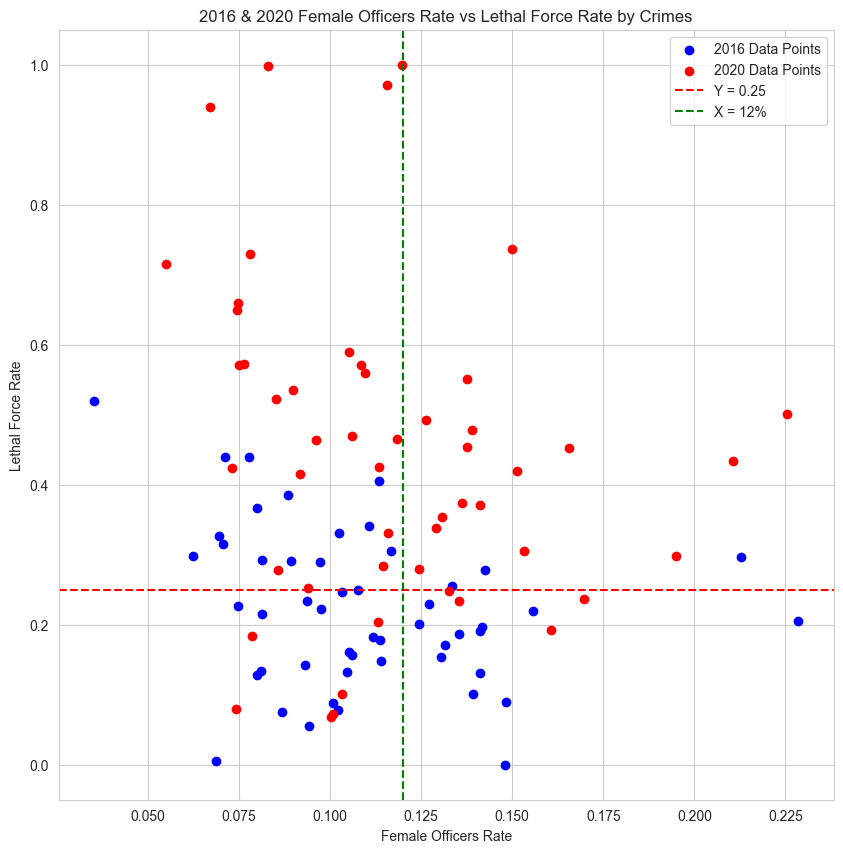

In [33]:
# Figure 4: 2016 & 2020 Female Officers Rate vs Lethal Force Rate by Crimes
plt.figure(figsize=(10, 10))
plt.scatter(data_2016['%_FEMALE'], data_2016['STD_FORCE_TO_CRIME'], color='blue', label='2016 Data Points')
plt.scatter(data_2020['%_FEMALE'], data_2020['STD_FORCE_TO_CRIME'], color='red', label='2020 Data Points')
plt.axhline(y=0.25, color='red', linestyle='--', label='Y = 0.25')
plt.axvline(x=0.12, color='green', linestyle='--', label='X = 12%')
plt.xlabel('Female Officers Rate')
plt.ylabel('Lethal Force Rate')
plt.title("2016 & 2020 Female Officers Rate vs Lethal Force Rate by Crimes")
plt.legend()
plt.show()

Conclusion:

- From Figures 1 & 2, Female Officers Rate and Lethal Force Rate are might not correlated.

- From Figures 3 & 4, Lethal Force Rate are higher in 2020 than 2016. (All the Red Points are higher than the Blue Points)

### Correlation

<Axes: >

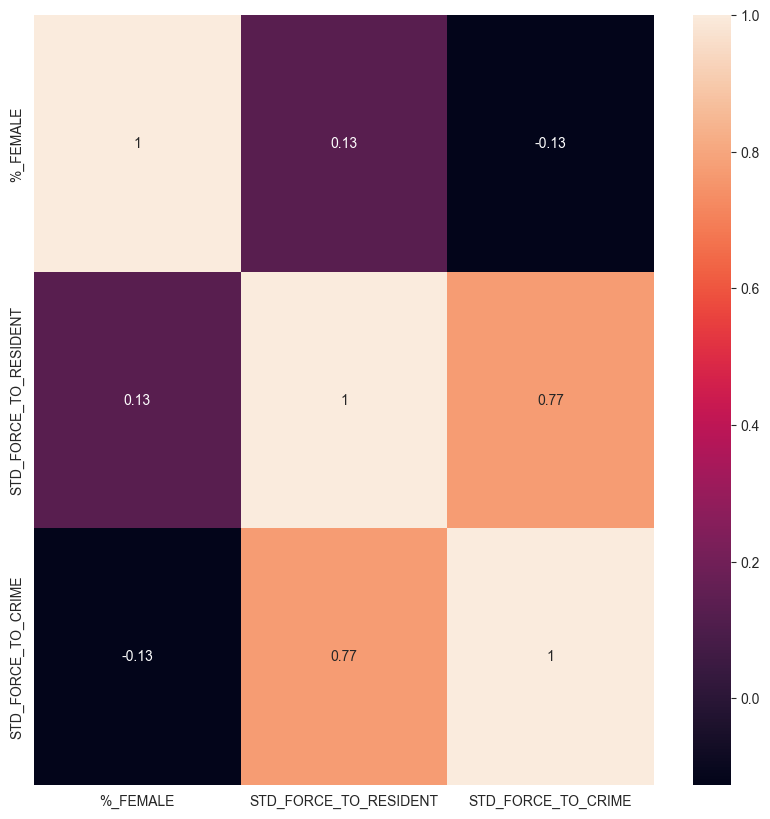

In [35]:
# Correlation Matrix of All Data
corr_matrix = data[['%_FEMALE', 'STD_FORCE_TO_RESIDENT', 'STD_FORCE_TO_CRIME']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)

In [ ]:
# Correlation Matrix of 2016
corr_matrix = data_2016[['%_FEMALE', 'STD_FORCE_TO_RESIDENT', 'STD_FORCE_TO_CRIME']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)

In [ ]:
# Correlation Matrix of 2020
corr_matrix = data_2020[['%_FEMALE', 'STD_FORCE_TO_RESIDENT', 'STD_FORCE_TO_CRIME']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)

Conclusion:
    
- The relationship between female officers rate and lethal force rate is not linear.